In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\zacha\anaconda3\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [43]:
df = pd.read_csv('oil_spill_data.csv')
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [49]:
df['Pipeline Location'].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [33]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [34]:
# Assuming your DataFrame is called 'df'
correlations = df.corrwith(df['All Costs'])

correlations_sorted = correlations.sort_values(ascending=False)

print(correlations_sorted)

All Costs                               1.000000
Environmental Remediation Costs         0.970781
Other Fatalities                        0.941063
Emergency Response Costs                0.882844
Public/Private Property Damage Costs    0.867270
Public Injuries                         0.864884
Liquid Recovery (Barrels)               0.663939
Unintentional Release (Barrels)         0.318569
Other Costs                             0.308761
Property Damage Costs                   0.178809
All Injuries                            0.123883
Public Evacuations                      0.117224
Lost Commodity Costs                    0.108284
Net Loss (Barrels)                      0.061923
Accident Latitude                       0.035384
Supplemental Number                     0.018230
Accident Longitude                      0.006489
Intentional Release (Barrels)          -0.000764
Operator ID                            -0.029893
Accident Year                          -0.034997
Report Number       

C:\Users\zacha\AppData\Local\Temp\ipykernel_7972\980728193.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['All Costs'])


In [41]:
df = df[['All Costs', 'Environmental Remediation Costs',
         'Emergency Response Costs','Public/Private Property Damage Costs', 
         'Public Injuries', 'Liquid Recovery (Barrels)', 'Operator Contractor Fatalities']]

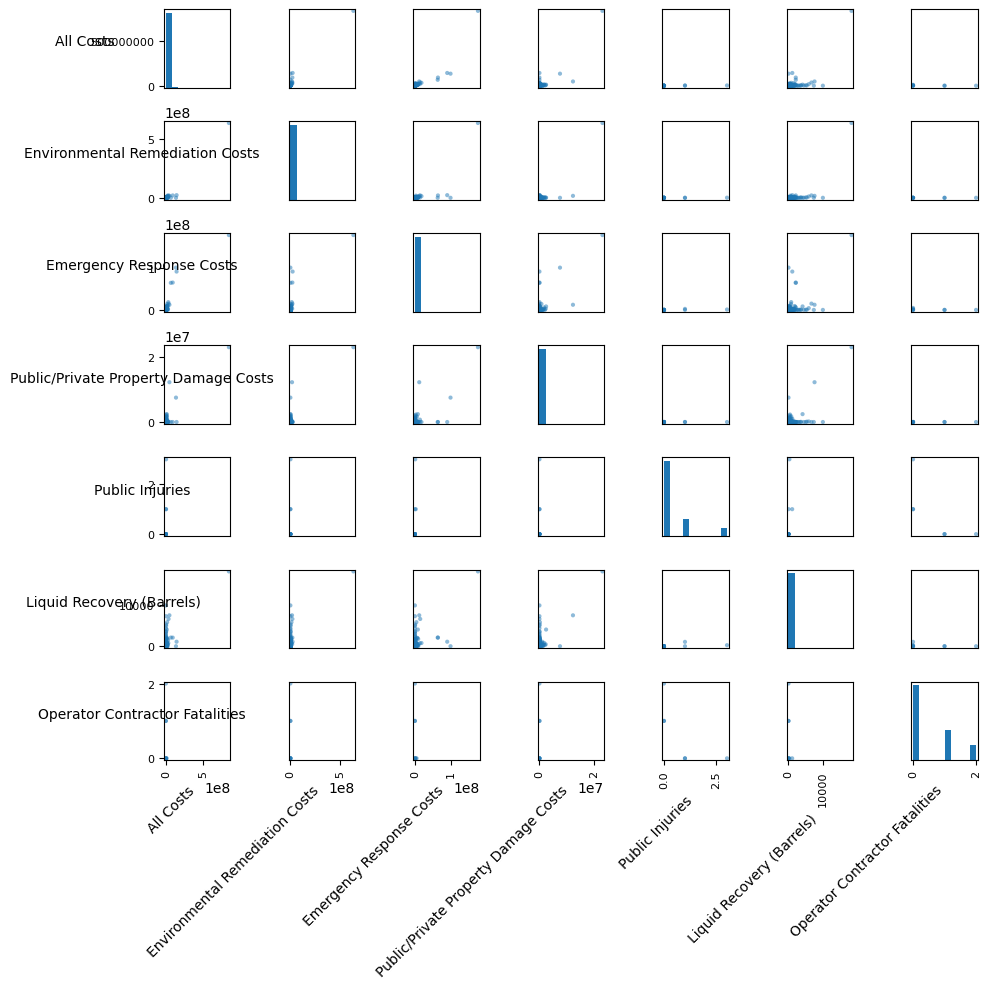

In [42]:

# Assuming your DataFrame is called 'df'
columns_to_plot = df.columns.tolist()

# Generate the scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(df[columns_to_plot], figsize=(10, 10))

# Rotate x and y labels
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_ha('right')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()